# **Delhi Population Control**
##### ***Data base suggestions, to Indian Government by Uday Pratap Singh, to control Delhi population growth.***


___

#### **A) Why it is important to Depopulate Delhi, or at least control the population growth?**

Let's start by importing libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

#for plot
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/lin

***Now, import data***

In [2]:
trend = pd.read_csv("Delhi Population Trend.csv")
tr = pd.read_csv("Delhi Population Trend_CSV.csv")
trend.head()

,Census,Population
0,1901,405819
1,1911,413851
2,1921,488452
3,1931,636246
4,1941,"9,17,939"


*Plot the population trend of Delhi with repsect to time.*

TypeError: can't multiply sequence by non-int of type 'float'

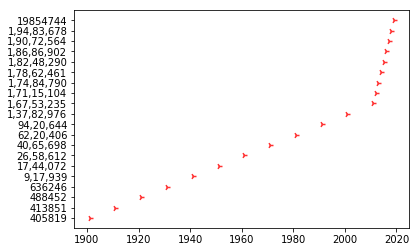

In [4]:
import seaborn as sns
ax=sns.regplot(x="Census", y="Population", data=trend, color="red", marker="4")

#please ignore the error and see the plot below error notification

 *In the above plot, we can clearly see how population has increased over time and slope slope of the plot increased tremendously for past few years*
 
 #### **B) Now, let's explore how we can derive a strategy to get control over the situation, using available data.**
 
 
 There are mainly 2 kind of population in Delhi, that significantly contributes to pollution:
 - Who are resident of Delhi. These are further of 2 kind:
         - Who are by birth, resident of Delhi.
         - who have moved to Delhi for Job or Business.
 - Who regularly visit Delhi. 
 
 *One thing common in all of above is that they have some incentive to live in or visit Delhi: whether it is career, or best quality health care service of AIIMS, or anything else. * **Problem of Delhi can be solved if we can provide these incentive, at much more convenient location outside Delhi, to above mentioned population**
 
Now, let's explore, what are these incentives are, and what can be done. 

If someone has to pass through Delhi for a for something, which is also available in Delhi, he won't go to another city for same. So let's start with ***connectivity of Delhi versus Neighboring cities*** with the other parts of country.


*Load the Foursquare Credentials.*

In [5]:
CLIENT_ID = 'Not Sharing This With You' # your Foursquare ID
CLIENT_SECRET = 'Not Sharing This With You' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D0URIR3FR3PHYXW2ROONC2WPWKSAGICT23KM35N5FE2EWQKI
CLIENT_SECRET:LM32RNYNH1Q5JQF4FZP5OQCFZAGGMIXCGMHB5012ARWU5MKB


*Get the Delhi location, and define parameters.*

In [6]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

28.6517178 77.2219388


*Search for railway stations within 80 Km radius of Delhi.

In [7]:
search_query = 'Railway station'
radius = 80000
print(search_query + ' .... OK!')

Railway station .... OK!


*Create URL*

In [8]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=D0URIR3FR3PHYXW2ROONC2WPWKSAGICT23KM35N5FE2EWQKI&client_secret=LM32RNYNH1Q5JQF4FZP5OQCFZAGGMIXCGMHB5012ARWU5MKB&ll=28.6517178,77.2219388&v=20180604&query=Railway station&radius=80000&limit=500'

*Print result as json.*

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d17d654d9a6e600387cd2a7'},
 'response': {'venues': [{'id': '4c16685f7fd00f47bf2efab6',
    'name': 'New Delhi Railway Station (NDLS)',
    'location': {'address': 'Paharganj-Ajmeri Gate',
     'lat': 28.642028217894634,
     'lng': 77.21962470476957,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.642028217894634,
       'lng': 77.21962470476957}],
     'distance': 1102,
     'postalCode': '110001',
     'cc': 'IN',
     'neighborhood': 'Central Delhi',
     'city': 'New Delhi',
     'state': 'Delhi',
     'country': 'India',
     'formattedAddress': ['Paharganj-Ajmeri Gate',
      'New Delhi 110001',
      'Delhi',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'shortName': 'Train Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'primary': True}],
    'refe

In [10]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4c16685f7fd00f47bf2efab6,Paharganj-Ajmeri Gate,IN,New Delhi,India,NaN,1102,"[Paharganj-Ajmeri Gate, New Delhi 110001, Delh...","[{'label': 'display', 'lat': 28.64202821789463...",28.642028,77.219625,Central Delhi,110001,Delhi,New Delhi Railway Station (NDLS),v-1561843284
1,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4c47e2fe1ddec928e5e29e32,Shyama Prasad Mukherji Marg,IN,Delhi,India,NaN,1179,"[Shyama Prasad Mukherji Marg, Delhi 110001, De...","[{'label': 'display', 'lat': 28.66057916330529...",28.660579,77.228565,NaN,110001,Delhi,Old Delhi Railway Station (DLI),v-1561843284
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,518ddbdf498eab246c509547,"8591, Arakashan Road",IN,New Delhi,India,opp. new delhi railway station,803,"[8591, Arakashan Road (opp. new delhi railway ...","[{'label': 'display', 'lat': 28.64553655967833...",28.645537,77.217701,NaN,110055,Delhi,bloomrooms @ New Delhi Railway Station,v-1561843284
3,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4cca25af7965b60c3a04848a,"Bhavbhuti Marg, Kamla Market, Ajmeri Gate",IN,New Delhi,India,NaN,1026,"[Bhavbhuti Marg, Kamla Market, Ajmeri Gate, Ne...","[{'label': 'display', 'lat': 28.64276380976590...",28.642764,77.219411,Central Delhi,NaN,Delhi,"Platform No. 1, Delhi Railway Station",v-1561843284
4,[],False,527a7b8b498e0016b22a09c6,NaN,IN,NaN,India,NaN,474,[India],"[{'label': 'display', 'lat': 28.65423221914110...",28.654232,77.218013,NaN,NaN,NaN,Sadar Bazaar Railway Station,v-1561843284


In [11]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,New Delhi Railway Station (NDLS),Train Station,Paharganj-Ajmeri Gate,IN,New Delhi,India,NaN,1102,"[Paharganj-Ajmeri Gate, New Delhi 110001, Delh...","[{'label': 'display', 'lat': 28.64202821789463...",28.642028,77.219625,Central Delhi,110001,Delhi,4c16685f7fd00f47bf2efab6
1,Old Delhi Railway Station (DLI),Train Station,Shyama Prasad Mukherji Marg,IN,Delhi,India,NaN,1179,"[Shyama Prasad Mukherji Marg, Delhi 110001, De...","[{'label': 'display', 'lat': 28.66057916330529...",28.660579,77.228565,NaN,110001,Delhi,4c47e2fe1ddec928e5e29e32
2,bloomrooms @ New Delhi Railway Station,Hotel,"8591, Arakashan Road",IN,New Delhi,India,opp. new delhi railway station,803,"[8591, Arakashan Road (opp. new delhi railway ...","[{'label': 'display', 'lat': 28.64553655967833...",28.645537,77.217701,NaN,110055,Delhi,518ddbdf498eab246c509547
3,"Platform No. 1, Delhi Railway Station",Train Station,"Bhavbhuti Marg, Kamla Market, Ajmeri Gate",IN,New Delhi,India,NaN,1026,"[Bhavbhuti Marg, Kamla Market, Ajmeri Gate, Ne...","[{'label': 'display', 'lat': 28.64276380976590...",28.642764,77.219411,Central Delhi,NaN,Delhi,4cca25af7965b60c3a04848a
4,Sadar Bazaar Railway Station,None,NaN,IN,NaN,India,NaN,474,[India],"[{'label': 'display', 'lat': 28.65423221914110...",28.654232,77.218013,NaN,NaN,NaN,527a7b8b498e0016b22a09c6
5,"Platform Number 5 , New Delhi Railway Station",None,New Delhi Railway Station,IN,New Delhi,India,NaN,1183,"[New Delhi Railway Station, New Delhi 110001, ...","[{'label': 'display', 'lat': 28.64121982795762...",28.641220,77.220012,NaN,110001,Delhi,532998b1498e50e6ea270522
6,The Prime Balaji Deluxe @ New Delhi Railway St...,Hotel,8574 Arakashan Road Pahar Ganj,IN,New Delhi,India,NaN,844,"[8574 Arakashan Road Pahar Ganj, New Delhi 110...","[{'label': 'display', 'lat': 28.64524663433840...",28.645247,77.217433,Central Delhi,110055,Delhi,54f84ede498eae1662c04df0
7,Delhi Subzi Mandi Railway Station (SZM),Train Station,NaN,IN,NaN,India,NaN,2795,[India],"[{'label': 'display', 'lat': 28.66812112710958...",28.668121,77.200272,NaN,NaN,NaN,4e79fb4fd22d391717d89069
8,Sarai Rohilla | सराय रोहिल्ला Railway Station,Train Station,"New Rohtak Road, Sarai Rohilla, NH 10",IN,New Delhi,India,NaN,3639,"[New Rohtak Road, Sarai Rohilla, NH 10, New De...","[{'label': 'display', 'lat': 28.66313040756394...",28.663130,77.187023,NaN,110035,Delhi,4b99ae37f964a520a28b35e3
9,Hazrat Nizamuddin Railway Station (NZM),Train Station,Nizamuddin,IN,New Delhi,India,NaN,7703,"[Nizamuddin, New Delhi 110013, Delhi, India]","[{'label': 'display', 'lat': 28.58851106794408...",28.588511,77.254028,NaN,110013,Delhi,4cc1598b56bda0932250eb35


In [12]:
dataframe_filtered.name

0                      New Delhi Railway Station (NDLS)
1                       Old Delhi Railway Station (DLI)
2                bloomrooms @ New Delhi Railway Station
3                 Platform No. 1, Delhi Railway Station
4                          Sadar Bazaar Railway Station
5         Platform Number 5 , New Delhi Railway Station
6     The Prime Balaji Deluxe @ New Delhi Railway St...
7               Delhi Subzi Mandi Railway Station (SZM)
8         Sarai Rohilla | सराय रोहिल्ला Railway Station
9               Hazrat Nizamuddin Railway Station (NZM)
10                                      Railway Station
11        Optimum Palm D'or @ New Delhi Railway station
12               Platform No. 4 - Delhi Railway Station
13                       Chawndni Chowk Railway Station
14            New Delhi Railway Station , Platform No 2
15            Platfrom No. 3, New Delhi Railway Station
16                Platform No.14, Delhi Railway Station
17    Upper Class Waiting Hall New Delhi Railway

***Now we have all the required data related to nearby railway stations, let's see stations' location on map.***

In [13]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Delhi
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Delhi',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Railway Stations as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        label=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In above plot, we can clearly see that there's no railway station in Noida, while there are many railway stations in Delhi. Thus, if someone usually travels a lot will prefer to live in Delhi over Noida. I someone come here from another city to buy something or some services, or for medical purposes, etc, by train, he/she will have to pass through Delhi, even if he want to go to Noida. If he has to go through Delhi and service or product he is looking for is available in Delhi, then why will he go to Noida instead of Delhi?

**SOLUTION:** There must be a railway station in Noida, so that people do not need to enter Delhi, if Noida, with a railway station, is more convenient to them.

**Education** is another important factor for which people move across the states, and spend much time in another state- sometimes settle. Let's explore developed Delhi is in education sector as compare to surrounding. Let's see how many institions of national importance are there in Delhi and its surrounding.

In [14]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

28.6517178 77.2219388


In [15]:

search_query = 'Institute of National Importance'
radius = 50000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()


# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)


# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


dataframe_filtered.name

0              Morarji Desai National Institute Of Yoga
1     The National Institute Of Entrepreneurship & S...
2     NISTADS (National Institute Of Science Technol...
3     National Institute Of Criminology And Forensic...
4              National institute of fashion technology
5                National Institute of Business Studies
6              National Institute Of Fashion Technology
7         National institute of health & family welfare
8                      National institute of immunology
9     National Institute Of Plant Genome Research (N...
10               National institute of business studies
11    NISCAIR (National Institute of Science Communi...
12                     National Institute Of Immunology
13      National Institute of Public Finance and Policy
14        National Institute of Business Studies (NIBS)
15    NIFTEM National Institute Of Food Technology E...
Name: name, dtype: object

*Now, generate the map.*

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Delhi
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Delhi',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Railway Stations as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        label=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Above plot displays that some of the best institutions of country are densely situated in Delhi, while few in surrounding. Even though NCR region is known for quantity of private institutions, still lack of best quality institutions as compared to Delhi make these places much less attractive than Delhi.

**SOLUTION:** With quantity, NCR and nearby cities also need some best quality education bodies to attract people as much as Delhi do.



Delhi is known for its medical & health care facilities. Delhi has many prominent bodies that provide medical services and education. This is another attraction for people from all over the country. Let's explore how, neighboring cities are doing in this field with respect to Delhi; do they also hold same potential to attract public?

*Start with importing data that contain most prominent hospitals of Delhi and its neighboring cities.*

In [17]:
Hospitals = pd.read_csv("Hospitals NCR.csv")
Hospitals.head()

,Hospitals,Location
0,All India Institute of Medical Sciences,Delhi
1,Dr. Mohan’s Diabetes Specialities Centre,Delhi
2,Dharamshila Cancer Hospital and Research Centre,Delhi
3,"Eden Hospital, East of Kailash",Delhi
4,Guru Teg Bahadur Hospital,Delhi


*To compare the number of these most prominent hospitals, plot a bar chart of location vs count of hospitals in these locations.*

Text(0.5, 1.0, 'Number of Prominent Hospitals in Delhi and neighboring cities')

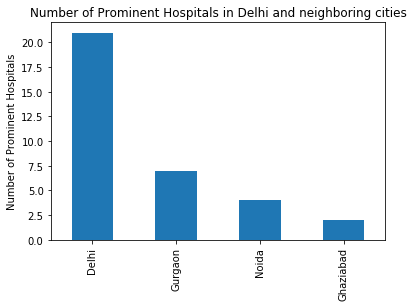

In [18]:
fig, ax = plt.subplots()
Hospitals['Location'].value_counts().plot(ax=ax, kind='bar')

#Label the y-axis and give title.
plt.ylabel('Number of Prominent Hospitals')
plt.title('Number of Prominent Hospitals in Delhi and neighboring cities')

Graph shows, neighboring cities are incapable of attracting public, to their hospitals, as much as Delhi do.

**SOLUTION:** All the neighboring cities of Delhi need more quantity of prominent hospitals, to divert public from Delhi to these cities.


Now, the biggest issue is that Delhi provides magnificently higher count of employment, that most of the country. Thus, people live in Delhi, because their career is in Delhi. Let's see, how much is the difference in count of companies in Delhi and that of in it's neighboring states.


*Import the data that have count of active companies as of on 31st January 2016*

In [20]:
#Import Data
Companies = pd.read_csv("No. of Companies.csv")
Companies.head()

,State,"Active Companies as on January 31, 2016",Area of State(Squared KM),Company per KM-Sq
0,Delhi,204429,1483,137.848300
1,Haryana,23642,44212,0.534742
2,Uttar Pradesh,53634,243290,0.220453
3,Rajasthan,35789,342238,0.104573


*Plot Bar chart for Companies Counts of Delhi and Neighboring States*

Text(0.5, 1.0, 'Companies Counts of Delhi and Neighboring States')

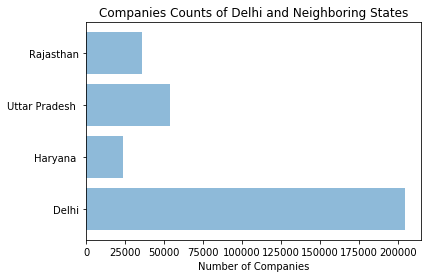

In [21]:
#Plot Bar chart for Companies Counts of Delhi and Neighboring States
y_pos = np.arange(len(Companies["State"]))
performance = Companies["Active Companies as on January 31, 2016"]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, Companies["State"])
plt.xlabel('Number of Companies')
plt.title('Companies Counts of Delhi and Neighboring States')

Plot tells, there is a huge difference in the no. of companies in Delhi and that of in any of the neighboring state. But wait, Delhi is much smaller in area than any of these neighboring state. to get the true idea of the situation, let's plot average density of companies in these states.

Text(0.5, 1.0, 'Companies per Square kilometers in Delhi and Neighboring States')

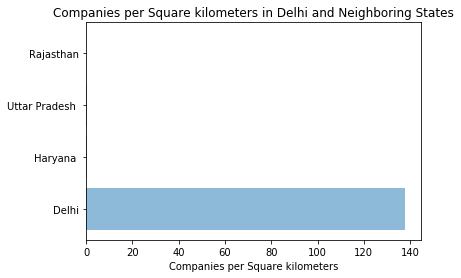

In [22]:
#Plot Bar chart for Companies per Square kilometers in Delhi and Neighboring States
y_pos = np.arange(len(Companies["State"]))
performance = Companies["Company per KM-Sq"]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, Companies["State"])
plt.xlabel('Companies per Square kilometers')
plt.title('Companies per Square kilometers in Delhi and Neighboring States')

BOOM !!!

Companies' densities are almost negligible in these neighboring states when compared to companies density of Delhi.

**SOLUTION:** Policies should be made to attract new companies and old well settled companies to build their offices and provide employment in different cities of these neighboring states.



### **Let's Conclude**

**Problem 1:** No Railway Station in Noida.

    - **SOLUTION:** There must be a railway station in Noida, so that people do not need to enter Delhi, if Noida, with a railway station, is more convenient to them.
     
     
**Problem 2:** Denser quality Education Bodies in Delhi as compared to surroundings. 
     
    - **SOLUTION:** With quantity, NCR and nearby cities also need some best quality education bodies to attract people as much as Delhi do.
     
     
**Problem 3:** Denser prominent Medical Services Bodies in Delhi as compared to surroundings. 
    
    - **SOLUTION:** All the neighboring cities of Delhi need more quantity of prominent hospitals, to divert public from Delhi to these cities.
     
     
**Problem 4:** Employers are concentrated at Delhi.

    - **SOLUTION:** Policies should be made to attract new companies and old well settled companies to build their offices and provide employment in different cities of these neighboring states.






______________________
*Thank You*

*Uday Pratap Singh*

*udaychauhan94@gmail.com*

*8218870810*




_______



#### **Data Sources**

   - https://foursquare.com/
   - https://data.gov.in/
   - https://en.wikipedia.org/wiki/List_of_hospitals_in_India
   - https://propstory.com/top-5-hospitals-in-noida/
   - www.mca.gov.in/.../Monthly_Information_Bulletin_CorporateSector_Jan_2016.pdf

